In [2]:
# Importing dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\bapej\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Reading in data
stock_data = pd.read_csv('data\stock_data.csv')
tweet_data = pd.read_csv('./data/daily-sentiment-summary.csv')

tweet_data.head()

,Date,Positive Tweets,Negative Tweets,Zero,Ticker
0,2015-01-01,42,-61,0,AMZN
1,2015-01-02,76,-34,0,AMZN
2,2015-01-03,28,-8,0,AMZN
3,2015-01-04,29,-10,0,AMZN
4,2015-01-05,120,-29,0,AMZN


In [20]:
# Converting Date columns to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date']).dt.date
tweet_data['Date'] = pd.to_datetime(tweet_data['Date']).dt.date

tweet_data["Ticker"] = tweet_data["Ticker"].apply(lambda x: x.replace("APPL", "AAPL"))

In [21]:
# Merging the data on the date column
merged_data = pd.merge(stock_data, tweet_data, left_on='date', right_on='Date')

# Droping unnecessary columns
merged_data = merged_data.drop(columns=['Unnamed: 0', 'split', 'dividend'])

In [6]:
merged_data.columns

Index(['symbol', 'date', 'open', 'close', 'volume', 'high', 'low',
       'Positive Tweets', 'Negative Tweets', 'Zero', 'Ticker'],
      dtype='object')

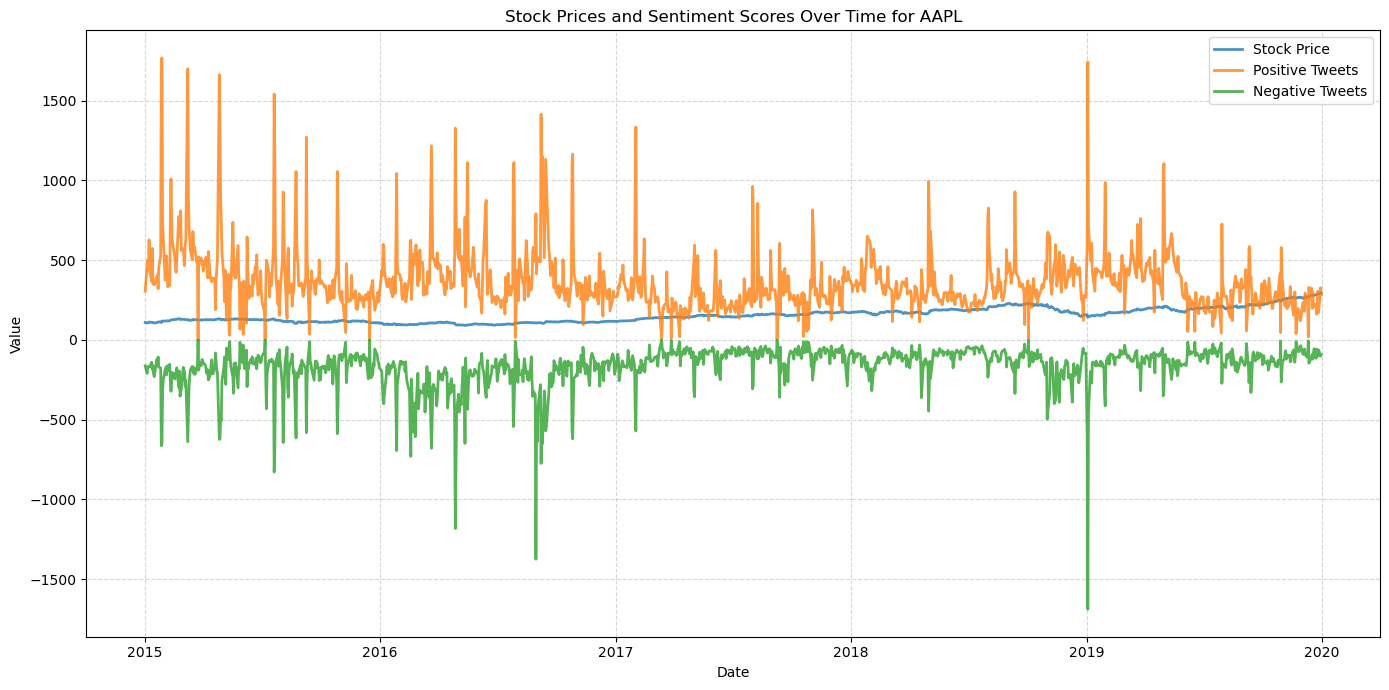

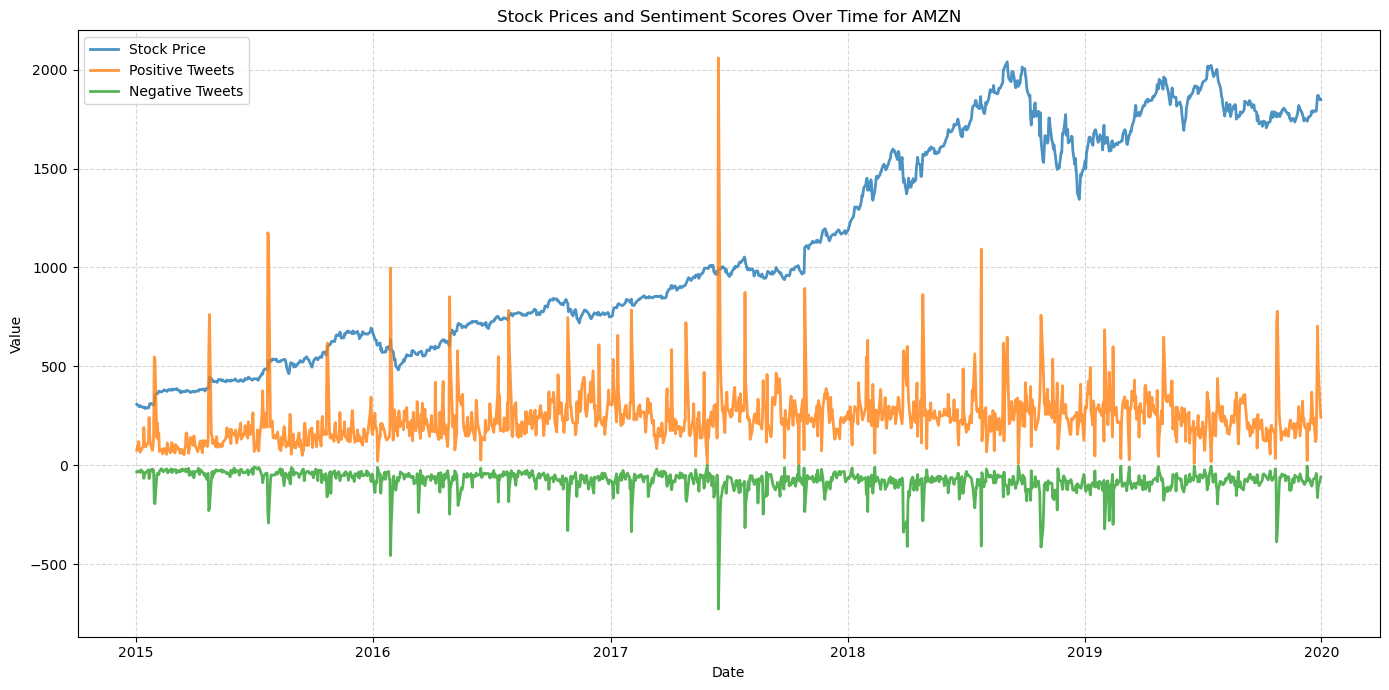

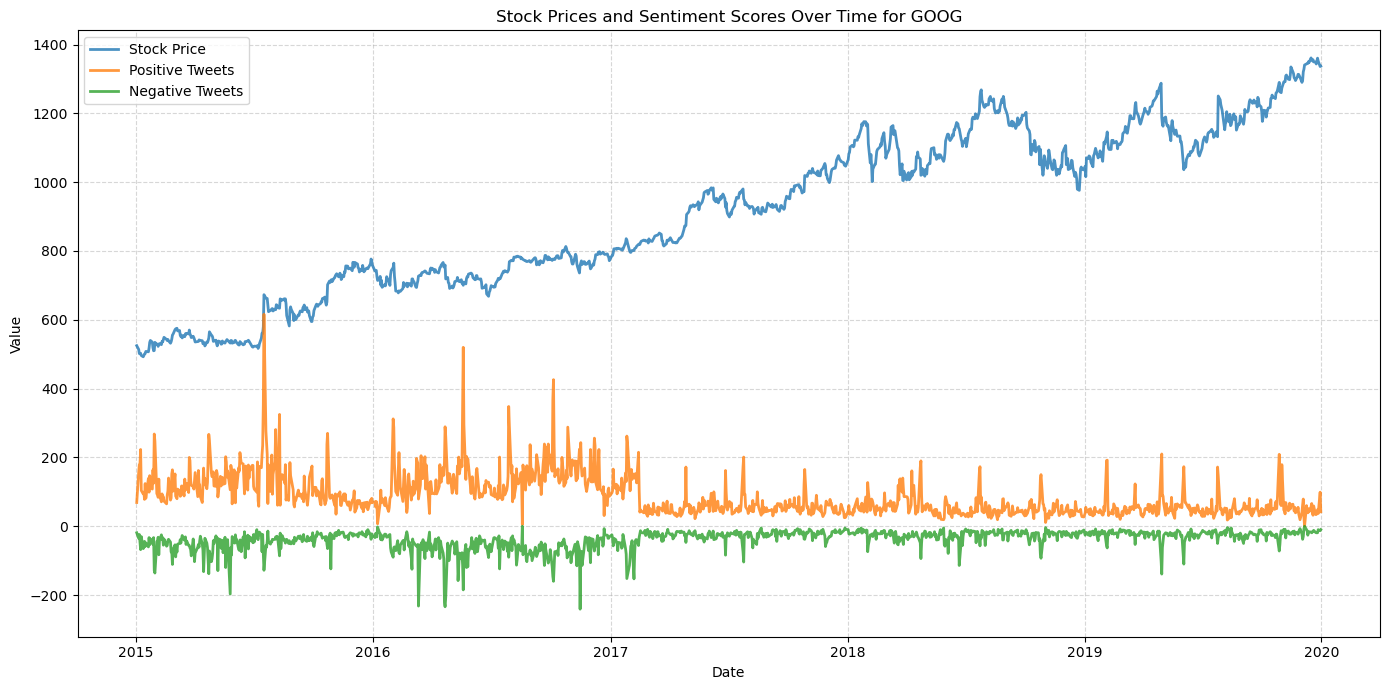

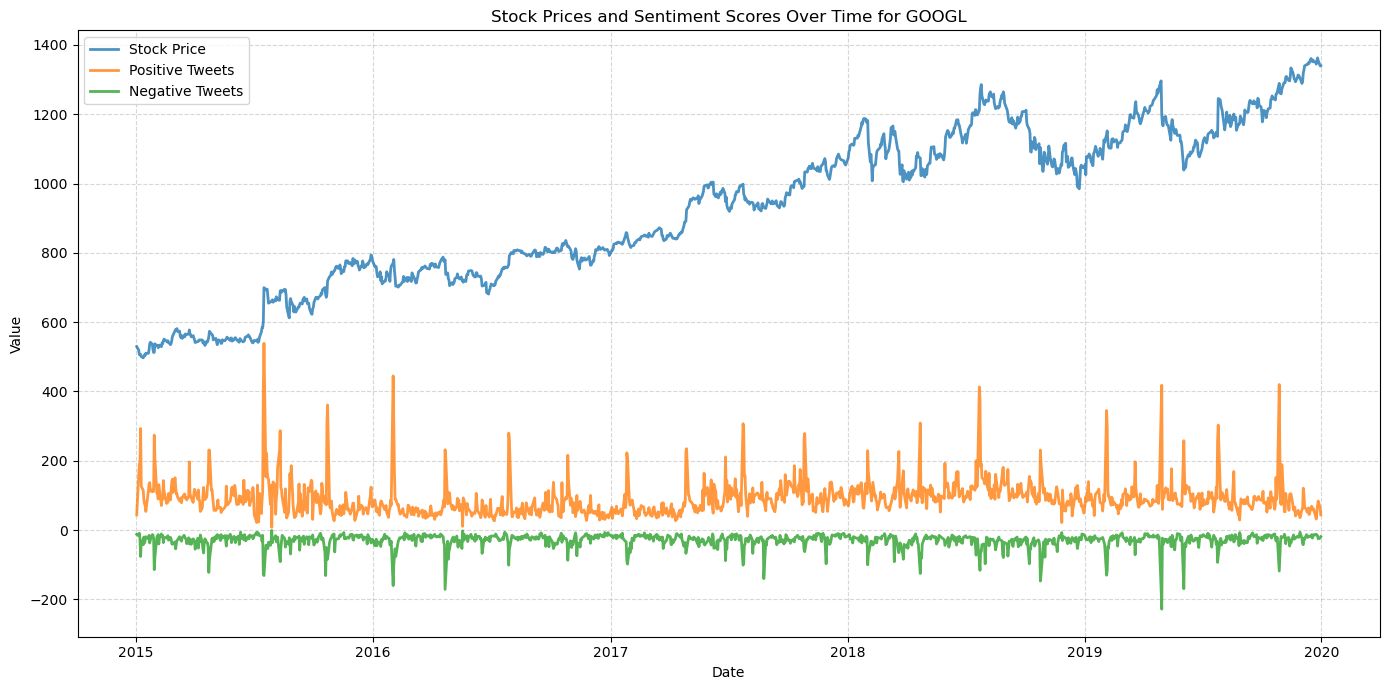

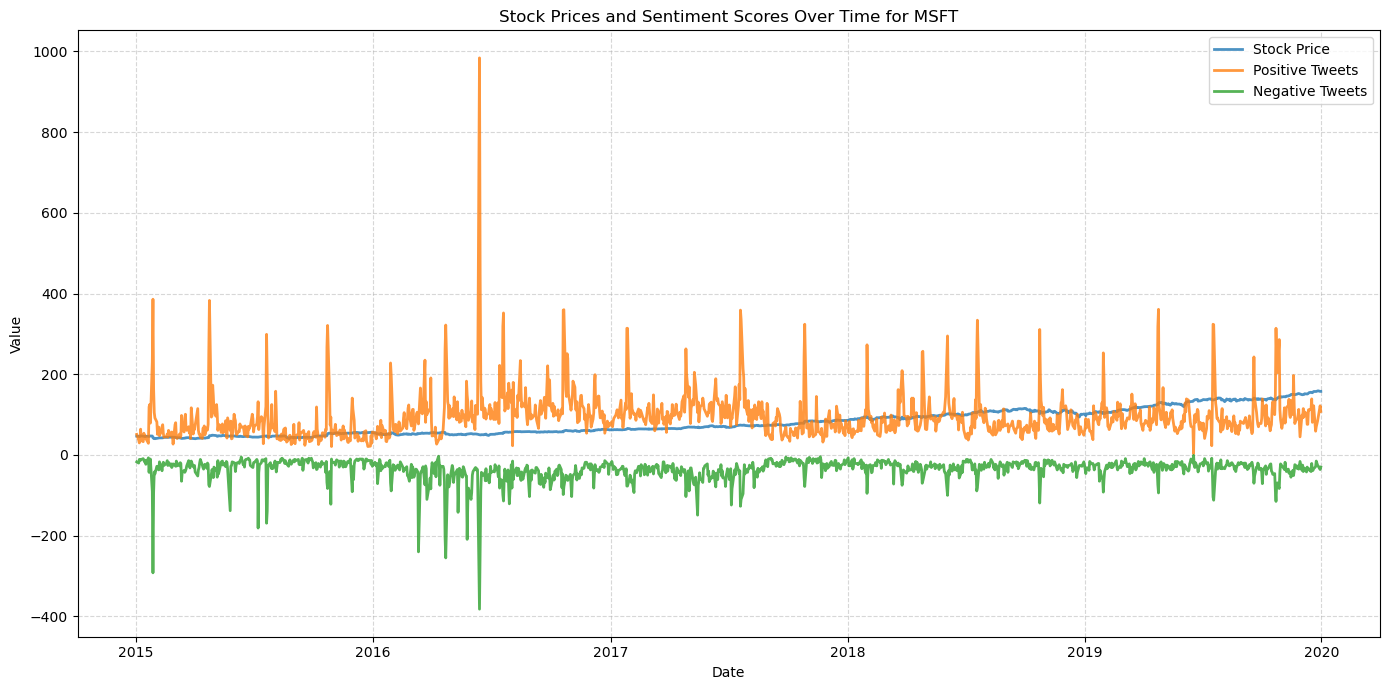

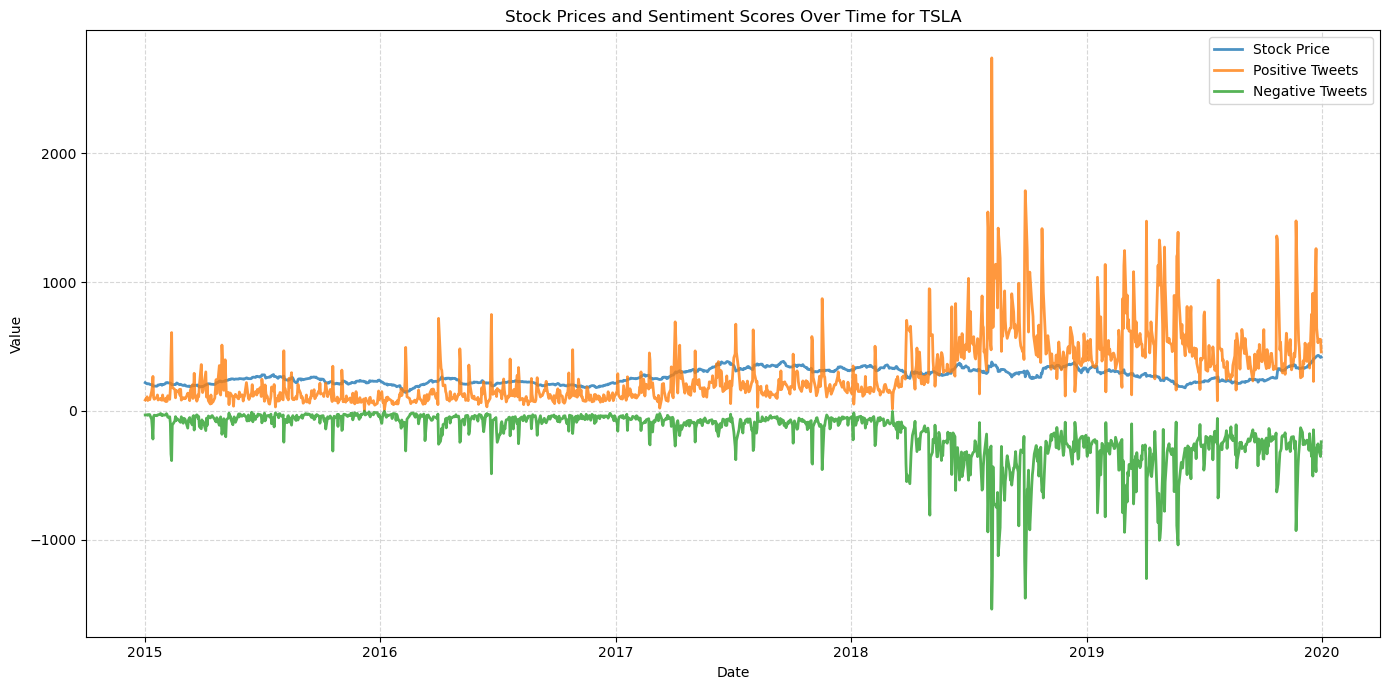

In [29]:
tickers = ["AAPL", "AMZN", "GOOG", "GOOGL", "MSFT", "TSLA"]

# Looping through each ticker
for ticker in tickers:
    # Filtering data for each ticker
    company_data = merged_data[(merged_data['symbol'] == ticker) & (merged_data['Ticker'] == ticker)]
    
    plt.figure(figsize=(14, 7))
    plt.plot(company_data['date'], company_data['close'], label='Stock Price', linewidth=2, alpha=0.8)
    
    # Plotting positive and negative tweets
    plt.plot(company_data['date'], company_data['Positive Tweets'], label='Positive Tweets', linewidth=2, alpha=0.8)
    plt.plot(company_data['date'], company_data['Negative Tweets'], label='Negative Tweets', linewidth=2, alpha=0.8)
    
    # Adding labels, title, and legend
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Stock Prices and Sentiment Scores Over Time for {ticker}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [20]:
# Creating lagged features
lag_features = ['open', 'close', 'volume', 'high', 'low', 'Positive Tweets', 'Negative Tweets']
for feature in lag_features:
    for lag in range(1, 4):
        merged_data[f'{feature}_lag_{lag}'] = merged_data[feature].shift(lag)

# Dropping rows with NaN values created by lagging
merged_data = merged_data.dropna()

# Defining the target variable
merged_data['target'] = merged_data['close'].shift(-1)
merged_data = merged_data.dropna()

In [21]:
# Dropping columns not needed
features = merged_data.drop(columns=['symbol', 'date', 'target', 'Zero', 'Ticker'])
target = merged_data['target']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
# Creating the linear regression model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Model evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(mse_linear)
print(r2_linear)

187.85576312705297
0.9992139139896251


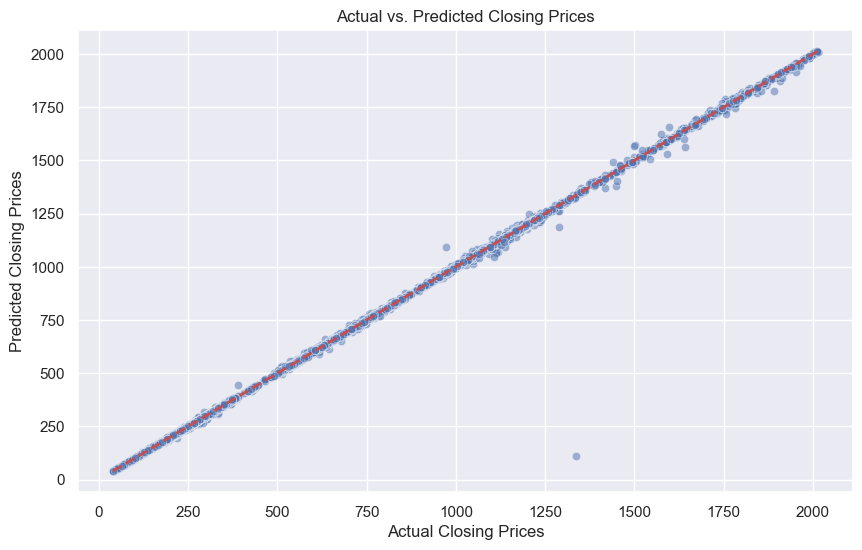

In [34]:
sns.set_theme(color_codes=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5)
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()